<a href="https://colab.research.google.com/github/nadinne94/testes_de_hipotese/blob/main/DesafioTesteDeHipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp Data Analytics 2024 | Challenge Teste de Hipóteses**

# **Lançamento de um novo produto**

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando **3** diferentes fórmulas para irem a mercado.

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de
dados (desafio_01_cosmeticos.csv) contendo as seguintes informações:

* id_produto: código identificador do produto, com a fórmula utilizada. Para diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3
* id_voluntária: código identificador da voluntária que utilizou o produto.
* durabilidade: quanto tempo o produto durou em horas.
* idade: idade da voluntária
* exposicao_sol: variável que indica 1 se a voluntária se expôs ao sol 0 caso
contrário.

De posse dessas informações, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

### **Bibliotecas e leitura da base**

In [ ]:
# bibliotecas base
import pandas as pd
import numpy as np

# bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# bibliotecas para estatística
import scipy.stats as stat
from scipy import stats
import math

# biblioteca para verificar assimetria
from scipy.stats import skew

In [ ]:
#Base de dados
df_cosm = pd.read_csv("desafio_01_cosmeticos.csv")
df_cosm

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1
...,...,...,...,...,...
295,3,296,18,52,0
296,3,297,30,19,0
297,3,298,43,23,1
298,3,299,41,19,0


In [ ]:
df_cosm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


### 1. Existe diferença estatisticamente significativa na durabilidade dos batons com formulas diferentes?

##### Análise exploratória estatística

In [ ]:
# Calculando as estatísticas para cada grupo de fórmula de batom
estatisticas_por_grupo = df_cosm.groupby('id_produto')['durabilidade'].agg(['max', 'min', 'mean', 'median', 'std'])

# Renomeando as colunas
estatisticas_por_grupo.columns = ['Durabilidade Máxima', 'Durabilidade Mínima', 'Durabilidade Média', 'Mediana', 'Desvio Padrão']

estatisticas_por_grupo

,Durabilidade Máxima,Durabilidade Mínima,Durabilidade Média,Mediana,Desvio Padrão
id_produto,,,,,
1,20,10,15.11,15.5,3.284168
2,11,5,7.77,8.0,1.942897
3,48,10,28.52,28.0,11.110537


In [ ]:
# amplitude da durabilidade
estatisticas_por_grupo['Durabilidade Máxima'] - estatisticas_por_grupo['Durabilidade Mínima']

id_produto
1    10
2     6
3    38
dtype: int64

- O Grupo de Fórmula 1 parece ter uma durabilidade mais consistente em torno da média
- O Grupo de Fórmula 2, por outro lado, tem uma durabilidade média mais baixa e menos variabilidade.
- O Grupo de Fórmula 3 apresenta uma durabilidade média mais alta, mas com uma variabilidade maior

In [ ]:
# Calculando os quartis para cada grupo de fórmula de batom
quartis_por_grupo = df_cosm.groupby('id_produto')['durabilidade'].quantile([0.25, 0.5, 0.75]).unstack()

# Renomeando as colunas
quartis_por_grupo.columns = ['Q1', 'Q2 (Mediana)', 'Q3']
quartis_por_grupo

,Q1,Q2 (Mediana),Q3
id_produto,,,
1,12.0,15.5,18.0
2,6.0,8.0,9.0
3,19.0,28.0,39.0


In [ ]:
quartis_por_grupo['Q3'] - quartis_por_grupo['Q1']

id_produto
1     6.0
2     3.0
3    20.0
dtype: float64

In [ ]:
# verificando os tipos de fórmulas de batons
formulas = df_cosm['id_produto'].unique()
formulas

array([1, 2, 3])

Grupos de Fórmula 1 e 2 mostram uma variabilidade moderada e menor, respectivamente, o Grupo de Fórmula 3 exibe uma variabilidade significativa na durabilidade dos batons

In [ ]:
# extraindo a durabilidade de cada tipo de produto
durabilidades = [df_cosm['durabilidade'][df_cosm['id_produto'] == formula] for formula in formulas]

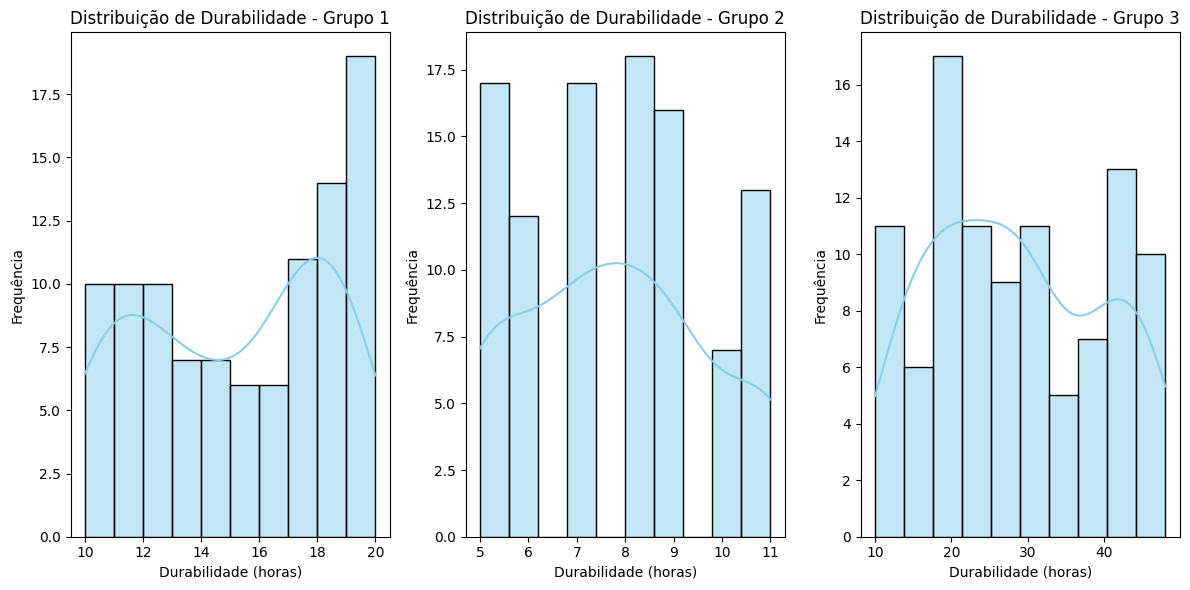

In [ ]:
# Gerar histogramas para cada grupo de fórmula de batom
plt.figure(figsize=(12, 6))

for i, durabilidade in enumerate(durabilidades):
    plt.subplot(1, len(durabilidades), i+1)
    sns.histplot(durabilidade, color='skyblue', edgecolor='black', bins=10, kde=True)
    plt.title(f'Distribuição de Durabilidade - Grupo {formulas[i]}')
    plt.xlabel('Durabilidade (horas)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


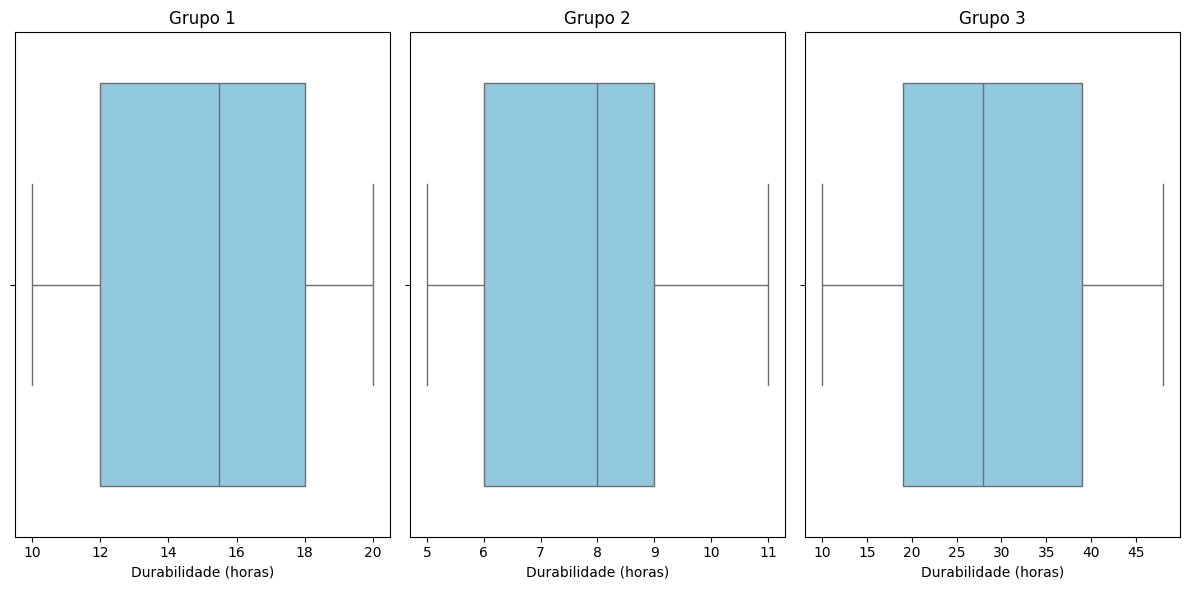

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Criando os boxplots separados para cada grupo de fórmula de batom
for i, (grupo, durabilidade) in enumerate(zip(formulas, durabilidades), start=1):
    plt.subplot(1, len(formulas), i)
    sns.boxplot(x=durabilidade, color='skyblue')
    plt.title(f'Grupo {grupo}')
    plt.xlabel('Durabilidade (horas)')
    plt.ylabel('')

# Ajustando o layout
plt.tight_layout()

# Exibindo os boxplots
plt.show()




#### Verificando a normalidade

In [ ]:
from scipy.stats import shapiro

In [ ]:
# Verificando normalidade dos dados
normalidade = [shapiro(durabilidade)[1] for durabilidade in durabilidades]

# Teste de Shapiro-Wilk para cada grupo
for i, p_valor in enumerate(normalidade):
    print(f"Grupo {formulas[i]} - P-valor Shapiro-Wilk: {p_valor}")

Grupo 1 - P-valor Shapiro-Wilk: 5.514397344086319e-06
Grupo 2 - P-valor Shapiro-Wilk: 2.13015555345919e-05
Grupo 3 - P-valor Shapiro-Wilk: 0.0005462845438160002


Os valores p fornecidos são muito baixos (praticamente zero), o que sugere que os dados não são normalmente distribuídos para nenhum dos grupos. Isso pode indicar que a suposição de normalidade para o teste ANOVA não é atendida.

#### teste Kruskal-Wallis (teste não paramétrico)

In [ ]:
from scipy.stats import kruskal

# Realizar o teste de Kruskal-Wallis
resultado_kruskal = kruskal(*durabilidades)

# Exibir o resultado do teste
print("Estatística do teste de Kruskal-Wallis:", resultado_kruskal.statistic)
print("Valor-p do teste de Kruskal-Wallis:", resultado_kruskal.pvalue)

# Conclusão do teste
if resultado_kruskal.pvalue < 0.05:
    print("Há diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.")
else:
    print("Não há evidência de diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.")


Estatística do teste de Kruskal-Wallis: 227.46096368302588
Valor-p do teste de Kruskal-Wallis: 4.050226510971091e-50
Há diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.


#### Conclusão:

Sim,  existe diferença estatisticamente significativa na durabilidade dos batons com formulas diferentes.

### 2. Essa diferença persiste ou não quando a voluntária se expõe ao sol? E com relação a idade?

In [ ]:
nao_exposto_sol = df_cosm[(df_cosm['exposicao_sol'] == 0)]
exposto_sol = df_cosm[(df_cosm['exposicao_sol'] == 1)]

#### Exposição ao sol

##### Não Exposto ao sol

In [ ]:
# Agrupar os dados pela exposição ao sol
grupos_nao_exposto_sol = nao_exposto_sol.groupby('id_produto')['durabilidade']

###### Análise Exploratória Estatística

In [ ]:
# calcular as estatísticas
grupos_nao_exposto_sol_est = grupos_nao_exposto_sol.agg(['max', 'min', 'mean', 'median', 'std'])

# Renomear as colunas
grupos_nao_exposto_sol_est.columns = ['Máximo', 'Mínimo', 'Média', 'Mediana', 'Desvio Padrão']
grupos_nao_exposto_sol_est


,Máximo,Mínimo,Média,Mediana,Desvio Padrão
id_produto,,,,,
1,20,15,17.727273,18.0,1.496348
2,11,5,7.961538,8.0,2.057617
3,48,13,33.901639,33.0,9.098910


In [ ]:
n_exp_sol_q1 = grupos_nao_exposto_sol.quantile(0.25)
n_exp_sol_q1

id_produto
1    17.0
2     6.0
3    28.0
Name: durabilidade, dtype: float64

In [ ]:
n_exp_sol_q3 = grupos_nao_exposto_sol.quantile(0.75)
n_exp_sol_q3

id_produto
1    19.0
2     9.0
3    42.0
Name: durabilidade, dtype: float64

In [ ]:
n_exp_sol_q3 - n_exp_sol_q1

id_produto
1     2.0
2     3.0
3    14.0
Name: durabilidade, dtype: float64

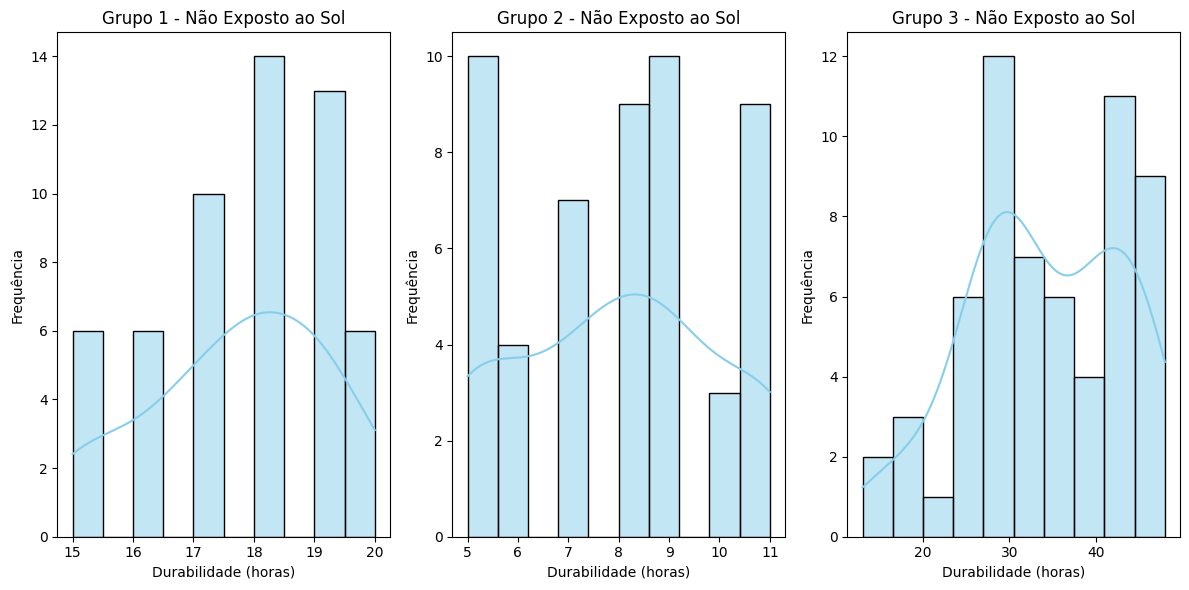

In [ ]:
# Ordenar os dados pelo id_produto
nao_exposto_sol_sorted = nao_exposto_sol.sort_values(by='id_produto')

# Criar os histogramas
plt.figure(figsize=(12, 6))
for i, produto in enumerate(nao_exposto_sol_sorted['id_produto'].unique(), start=1):
    plt.subplot(1, len(nao_exposto_sol_sorted['id_produto'].unique()), i)
    sns.histplot(data=nao_exposto_sol_sorted[nao_exposto_sol_sorted['id_produto'] == produto], x='durabilidade', color='skyblue', edgecolor='black', bins=10, kde=True)
    plt.title(f'Grupo {produto} - Não Exposto ao Sol')
    plt.xlabel('Durabilidade (horas)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

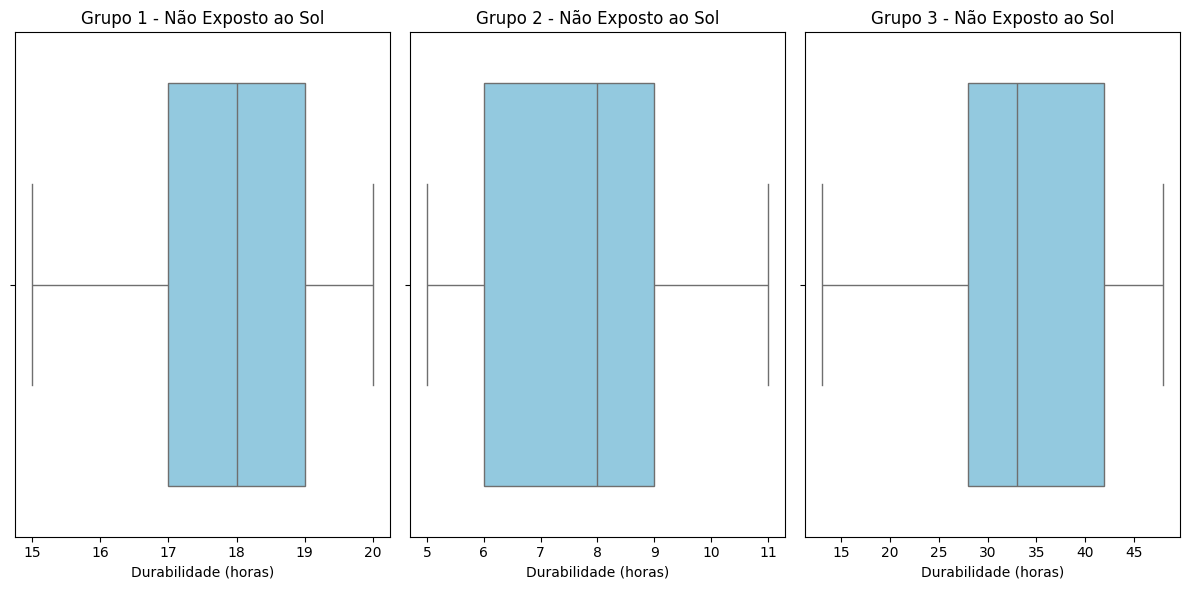

In [ ]:
# Criar o boxplot
plt.figure(figsize=(12, 6))
for i, produto in enumerate(nao_exposto_sol_sorted['id_produto'].unique(), start=1):
    plt.subplot(1, len(nao_exposto_sol_sorted['id_produto'].unique()), i)
    sns.boxplot(data=nao_exposto_sol_sorted[nao_exposto_sol_sorted['id_produto'] == produto], x='durabilidade', color='skyblue')
    plt.title(f'Grupo {produto} - Não Exposto ao Sol')
    plt.xlabel('Durabilidade (horas)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

###### Verificando a normalidade

In [ ]:
from scipy.stats import shapiro

In [ ]:
# Verificando normalidade dos dados
normalidade = [shapiro(nao_exposto_sol_sorted[nao_exposto_sol_sorted['id_produto'] == produto]['durabilidade'])[1] for produto in nao_exposto_sol_sorted['id_produto'].unique()]

# Teste de Shapiro-Wilk para cada grupo
for i, p_valor in enumerate(normalidade):
    print(f"Grupo {nao_exposto_sol_sorted['id_produto'].unique()[i]} - P-valor Shapiro-Wilk: {p_valor}")


Grupo 1 - P-valor Shapiro-Wilk: 0.0016932330327108502
Grupo 2 - P-valor Shapiro-Wilk: 0.0007681521237827837
Grupo 3 - P-valor Shapiro-Wilk: 0.028571689501404762


Não atende a distribuição normal

###### teste de Kruskal-Wallis não parametrico

In [ ]:
# Agrupar os dados por id_produto e extrair as durabilidades para cada grupo
grupo1_durabilidade = nao_exposto_sol[nao_exposto_sol['id_produto'] == 1]['durabilidade']
grupo2_durabilidade = nao_exposto_sol[nao_exposto_sol['id_produto'] == 2]['durabilidade']
grupo3_durabilidade = nao_exposto_sol[nao_exposto_sol['id_produto'] == 3]['durabilidade']

# Aplicar o teste de Kruskal-Wallis
statistico, p_valor = kruskal(grupo1_durabilidade, grupo2_durabilidade, grupo3_durabilidade)

# Exibir o resultado do teste
print("Estatística do teste de Kruskal-Wallis:", statistico)
print("Valor-p:", p_valor)

# Conclusão do teste
if p_valor < 0.05:
    print("Há diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.")
else:
    print("Não há evidência de diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.")


Estatística do teste de Kruskal-Wallis: 140.3477527838342
Valor-p: 3.3409710253823104e-31
Há diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.


O valor-p extremamente baixo (3.34e-31) sugere que há evidências suficientes para rejeitar a hipótese nula de que as medianas dos grupos são iguais.

######Conclusão

Persiste

##### Exposto ao Sol

In [ ]:
# Agrupar os dados pela exposição ao sol
grupos_exposto_sol = exposto_sol.groupby('id_produto')['durabilidade']

###### Análise Exploratória Estatística

In [ ]:
# calcular as estatísticas
grupos_exposto_sol_est = grupos_exposto_sol.agg(['max', 'min', 'mean', 'median', 'std'])

# Renomear as colunas
grupos_exposto_sol_est.columns = ['Máximo', 'Mínimo', 'Média', 'Mediana', 'Desvio Padrão']
grupos_exposto_sol_est


,Máximo,Mínimo,Média,Mediana,Desvio Padrão
id_produto,,,,,
1,17,10,11.911111,12.0,1.578581
2,11,5,7.562500,7.0,1.809035
3,48,10,20.102564,19.0,8.466015


In [ ]:
exp_sol_q1 = grupos_exposto_sol.quantile(0.25)
exp_sol_q1

id_produto
1    11.0
2     6.0
3    14.0
Name: durabilidade, dtype: float64

In [ ]:
exp_sol_q3 = grupos_exposto_sol.quantile(0.75)
exp_sol_q3

id_produto
1    13.0
2     9.0
3    23.0
Name: durabilidade, dtype: float64

In [ ]:
exp_sol_q3 - exp_sol_q1

id_produto
1    2.0
2    3.0
3    9.0
Name: durabilidade, dtype: float64

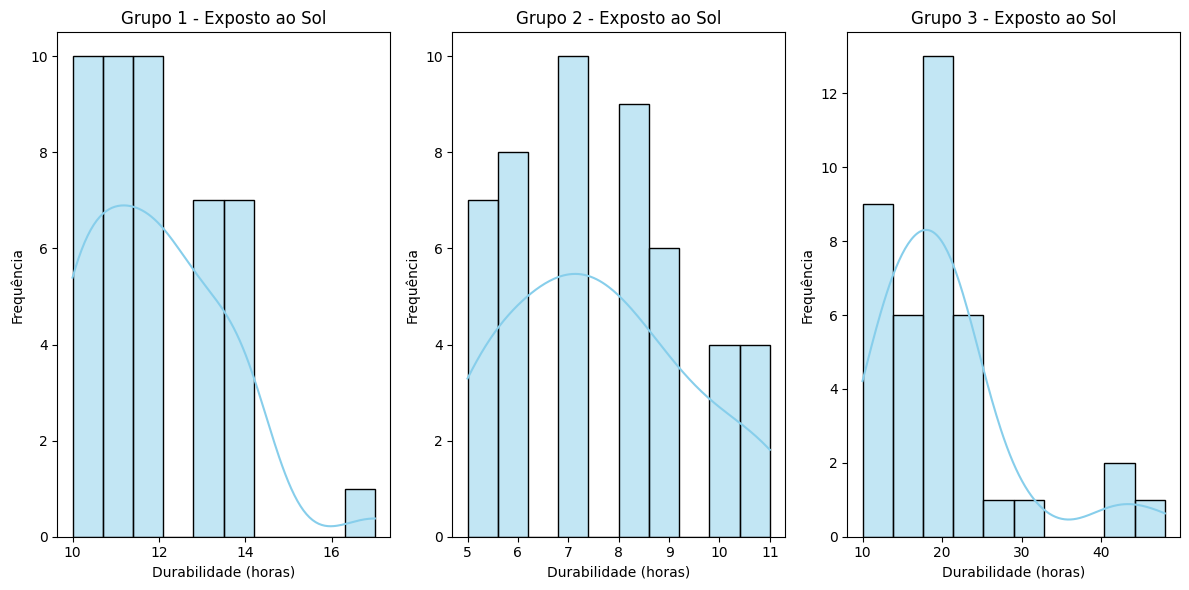

In [ ]:
# Ordenar os dados pelo id_produto
exposto_sol_sorted = exposto_sol.sort_values(by='id_produto')

# Criar os histogramas
plt.figure(figsize=(12, 6))
for i, produto in enumerate(exposto_sol_sorted['id_produto'].unique(), start=1):
    plt.subplot(1, len(exposto_sol_sorted['id_produto'].unique()), i)
    sns.histplot(data=exposto_sol_sorted[exposto_sol_sorted['id_produto'] == produto], x='durabilidade', color='skyblue', edgecolor='black', bins=10, kde=True)
    plt.title(f'Grupo {produto} - Exposto ao Sol')
    plt.xlabel('Durabilidade (horas)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

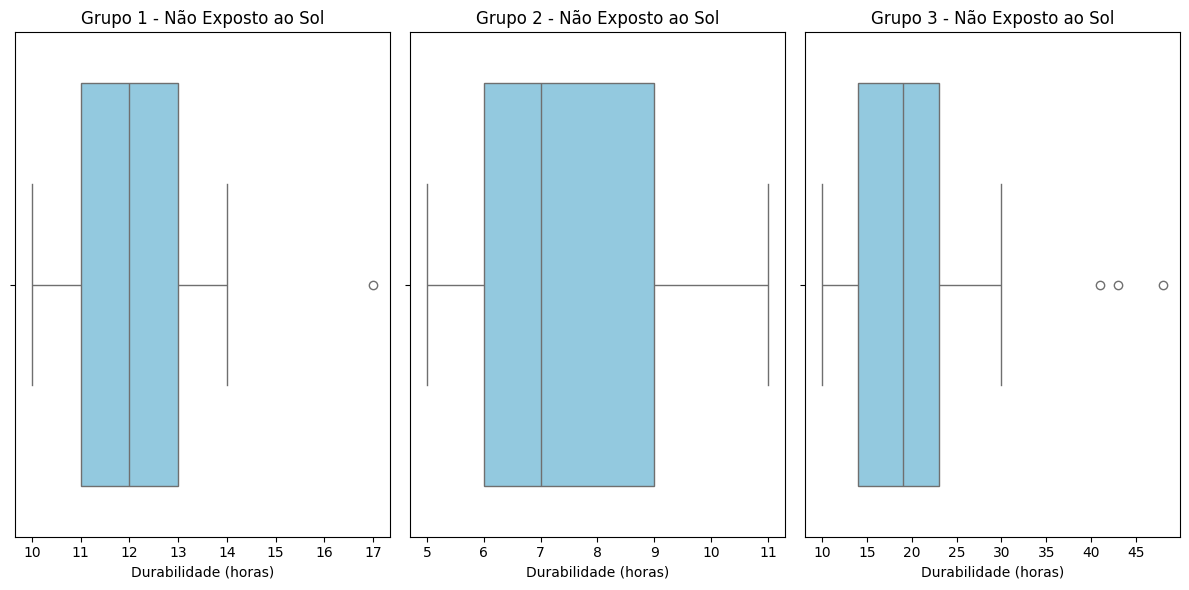

In [ ]:
# Criar o boxplot
plt.figure(figsize=(12, 6))
for i, produto in enumerate(exposto_sol_sorted['id_produto'].unique(), start=1):
    plt.subplot(1, len(exposto_sol_sorted['id_produto'].unique()), i)
    sns.boxplot(data=exposto_sol_sorted[exposto_sol_sorted['id_produto'] == produto], x='durabilidade', color='skyblue')
    plt.title(f'Grupo {produto} - Não Exposto ao Sol')
    plt.xlabel('Durabilidade (horas)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

###### Verificando a normalidade

In [ ]:
from scipy.stats import shapiro

In [ ]:
# Verificando normalidade dos dados
normalidade = [shapiro(exposto_sol_sorted[exposto_sol_sorted['id_produto'] == produto]['durabilidade'])[1] for produto in exposto_sol_sorted['id_produto'].unique()]

# Teste de Shapiro-Wilk para cada grupo
for i, p_valor in enumerate(normalidade):
    print(f"Grupo {exposto_sol_sorted['id_produto'].unique()[i]} - P-valor Shapiro-Wilk: {p_valor}")


Grupo 1 - P-valor Shapiro-Wilk: 0.0008909843163564801
Grupo 2 - P-valor Shapiro-Wilk: 0.008705202490091324
Grupo 3 - P-valor Shapiro-Wilk: 2.5353585442644544e-05


Não atende a distribuição normal

###### teste de Kruskal-Wallis não parametrico

In [ ]:
# Agrupar os dados por id_produto e extrair as durabilidades para cada grupo
grupo1_durabilidade_exposta = exposto_sol[exposto_sol['id_produto'] == 1]['durabilidade']
grupo2_durabilidade_exposta = exposto_sol[exposto_sol['id_produto'] == 2]['durabilidade']
grupo3_durabilidade_exposta = exposto_sol[exposto_sol['id_produto'] == 3]['durabilidade']

# Aplicar o teste de Kruskal-Wallis
statistico, p_valor = kruskal(grupo1_durabilidade_exposta, grupo2_durabilidade_exposta, grupo3_durabilidade_exposta)

# Exibir o resultado do teste
print("Estatística do teste de Kruskal-Wallis:", statistico)
print("Valor-p:", p_valor)

# Conclusão do teste
if p_valor < 0.05:
    print("Há diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.")
else:
    print("Não há evidência de diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.")

Estatística do teste de Kruskal-Wallis: 100.2972814954042
Valor-p: 1.6623483945921027e-22
Há diferença estatisticamente significativa na durabilidade dos batons entre os grupos de fórmula.


###### Conclusão

Persiste

#### Idade

##### Análise exploratória estatística

In [ ]:
# Calculando as idades para cada grupo de fórmula de batom
idade_por_grupo = df_cosm.groupby('id_produto')['idade'].agg(['max', 'min', 'mean', 'median', 'std'])

# Renomeando as colunas
idade_por_grupo.columns = ['Idade Máxima', 'Idade Mínima', 'Idade Média', 'Mediana', 'Desvio Padrão']
idade_por_grupo

,Idade Máxima,Idade Mínima,Idade Média,Mediana,Desvio Padrão
id_produto,,,,,
1,60,20,38.32,38.5,11.667861
2,60,18,38.98,41.0,12.502913
3,60,18,33.36,28.5,13.035709


In [ ]:
# amplitude da durabilidade
idade_por_grupo['Idade Máxima'] - idade_por_grupo['Idade Mínima']

id_produto
1    40
2    42
3    42
dtype: int64

In [ ]:
# Calculando os quartis para cada grupo de fórmula de batom
quartis_idade_por_grupo = df_cosm.groupby('id_produto')['idade'].quantile([0.25, 0.5, 0.75]).unstack()

# Renomeando as colunas
quartis_idade_por_grupo.columns = ['Q1', 'Q2 (Mediana)', 'Q3']
quartis_idade_por_grupo

,Q1,Q2 (Mediana),Q3
id_produto,,,
1,28.0,38.5,48.25
2,27.0,41.0,48.25
3,22.0,28.5,44.00


In [ ]:
quartis_idade_por_grupo['Q3'] - quartis_idade_por_grupo['Q1']

id_produto
1    20.25
2    21.25
3    22.00
dtype: float64

In [ ]:
grupo1 = df_cosm[df_cosm['id_produto'] == 1]
grupo2 = df_cosm[df_cosm['id_produto'] == 2]
grupo3 = df_cosm[df_cosm['id_produto'] == 3]

##### heatmap

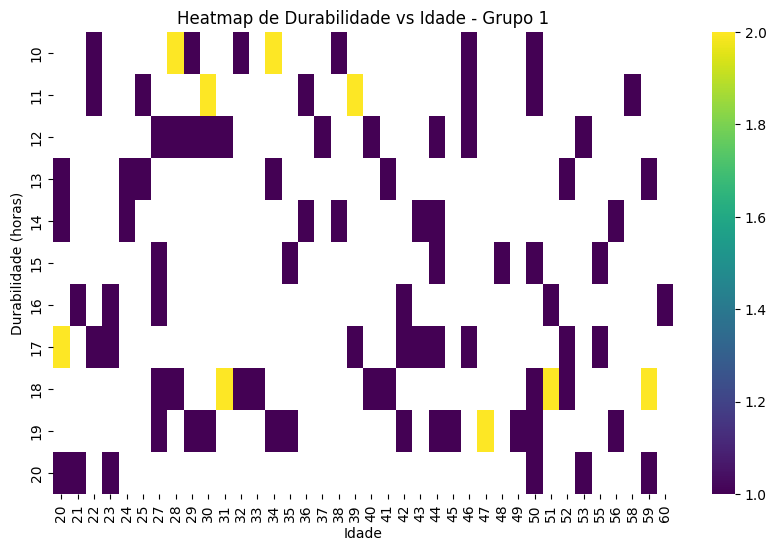

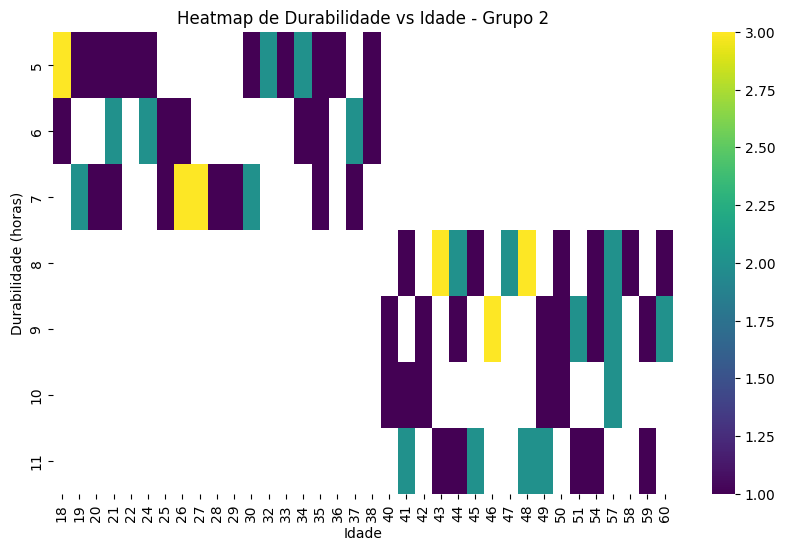

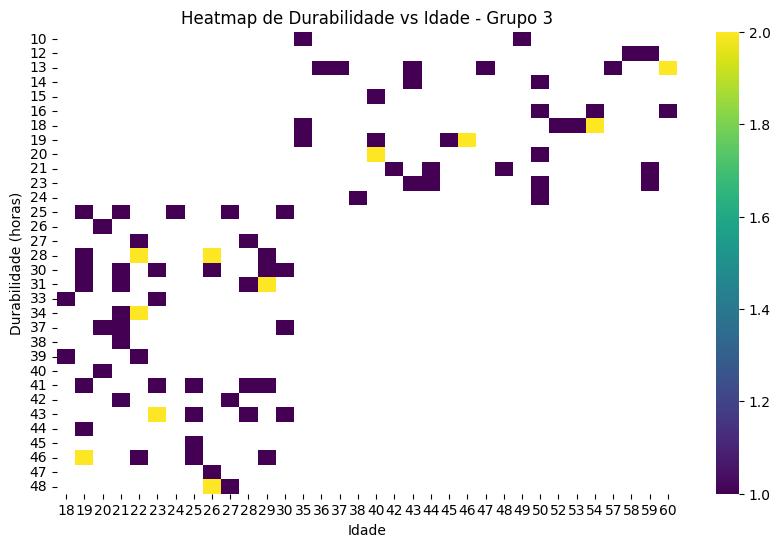

In [ ]:
# Criar um heatmap para o grupo 1
plt.figure(figsize=(10, 6))
sns.heatmap(data=grupo1.groupby(['durabilidade', 'idade']).size().unstack(), cmap='viridis')
plt.title('Heatmap de Durabilidade vs Idade - Grupo 1')
plt.xlabel('Idade')
plt.ylabel('Durabilidade (horas)')
plt.show()

# Criar um heatmap para o grupo 2
plt.figure(figsize=(10, 6))
sns.heatmap(data=grupo2.groupby(['durabilidade', 'idade']).size().unstack(), cmap='viridis')
plt.title('Heatmap de Durabilidade vs Idade - Grupo 2')
plt.xlabel('Idade')
plt.ylabel('Durabilidade (horas)')
plt.show()

# Criar um heatmap para o grupo 3
plt.figure(figsize=(10, 6))
sns.heatmap(data=grupo3.groupby(['durabilidade', 'idade']).size().unstack(), cmap='viridis')
plt.title('Heatmap de Durabilidade vs Idade - Grupo 3')
plt.xlabel('Idade')
plt.ylabel('Durabilidade (horas)')
plt.show()

##### dispersão

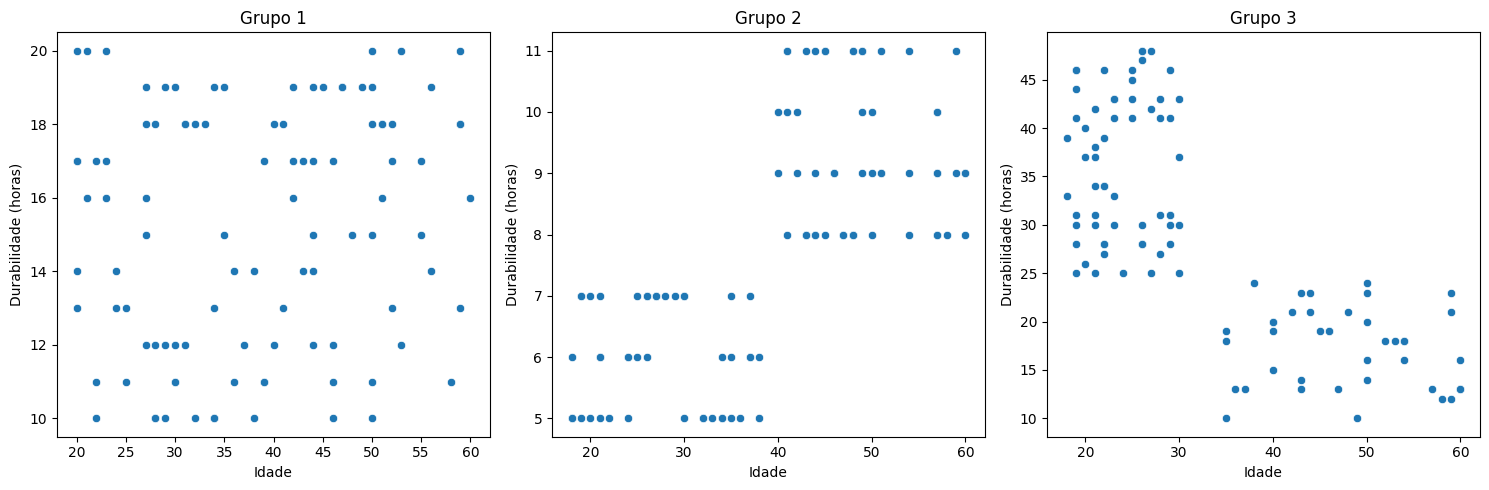

In [ ]:
# Criar gráficos de dispersão para cada grupo de produto
plt.figure(figsize=(15, 5))

# Grupo 1
plt.subplot(1, 3, 1)
sns.scatterplot(data=grupo1, x='idade', y='durabilidade')
plt.title('Grupo 1')
plt.xlabel('Idade')
plt.ylabel('Durabilidade (horas)')

# Grupo 2
plt.subplot(1, 3, 2)
sns.scatterplot(data=grupo2, x='idade', y='durabilidade')
plt.title('Grupo 2')
plt.xlabel('Idade')
plt.ylabel('Durabilidade (horas)')

# Grupo 3
plt.subplot(1, 3, 3)
sns.scatterplot(data=grupo3, x='idade', y='durabilidade')
plt.title('Grupo 3')
plt.xlabel('Idade')
plt.ylabel('Durabilidade (horas)')

plt.tight_layout()
plt.show()


##### spearmanr

In [ ]:
from scipy.stats import spearmanr

# Iterar sobre cada grupo de produto
for grupo_id in df_cosm['id_produto'].unique():
    # Filtrar os dados para o grupo atual
    grupo = df_cosm[df_cosm['id_produto'] == grupo_id]

    # Calcular o coeficiente de correlação de Spearman entre idade e durabilidade
    coeficiente_correlacao, p_valor = spearmanr(grupo['idade'], grupo['durabilidade'])

    # Exibir o resultado do teste
    print(f"Grupo {grupo_id}: Coeficiente de Correlação de Spearman = {coeficiente_correlacao:.4f}, Valor-p = {p_valor:.4f}")

Grupo 1: Coeficiente de Correlação de Spearman = 0.1462, Valor-p = 0.1467
Grupo 2: Coeficiente de Correlação de Spearman = 0.7436, Valor-p = 0.0000
Grupo 3: Coeficiente de Correlação de Spearman = -0.7246, Valor-p = 0.0000


Esses resultados indicam que:

- No Grupo 1, não há correlação significativa entre idade e durabilidade dos batons, pois o valor-p é maior que 0.05.
- No Grupo 2, há uma correlação positiva, a durabilidade dos batons tende a aumentar com a idade dos usuários.
- No Grupo 3, há uma correlação negativa, a durabilidade dos batons tende a diminuir com a idade dos usuários.

##### Faixa-etária

In [ ]:
df_cosm['idade'].unique()

array([40, 36, 47, 46, 56, 29, 52, 27, 19, 21, 26, 51, 57, 20, 34, 42, 55,
       43, 37, 30, 28, 23, 22, 25, 48, 41, 58, 49, 31, 50, 24, 44, 32, 33,
       54, 45, 60, 59, 18, 38, 35, 53, 39])

In [ ]:
# Criar uma nova coluna 'faixa_etaria' no DataFrame usando pd.cut()
bin = 6
nomes_faixas = ['18-25', '26-33', '34-41', '42-49', '50-58', '58+']

df_cosm['faixa_etaria'] = pd.cut(df_cosm['idade'], bins = bin, labels=nomes_faixas)
df_cosm['faixa_etaria'].value_counts().sort_index()


faixa_etaria
18-25    73
26-33    58
34-41    34
42-49    54
50-58    45
58+      36
Name: count, dtype: int64

###### teste Kruskal-Wallis (teste não paramétrico)

In [ ]:
from scipy.stats import kruskal

# Iterar sobre cada grupo de produto
for grupo_id in df_cosm['id_produto'].unique():
    # Filtrar os dados para o grupo atual
    grupo = df_cosm[df_cosm['id_produto'] == grupo_id]

    # Aplicar o teste de Kruskal-Wallis para a durabilidade
    estatistica, p_valor = kruskal(*[grupo[grupo['faixa_etaria'] == faixa]['durabilidade'] for faixa in nomes_faixas])

    # Exibir o resultado do teste
    print(f"Grupo {grupo_id}: Estatística Kruskal-Wallis = {estatistica:.4f}, Valor-p = {p_valor:.4f}")


Grupo 1: Estatística Kruskal-Wallis = 8.4299, Valor-p = 0.1341
Grupo 2: Estatística Kruskal-Wallis = 77.0539, Valor-p = 0.0000
Grupo 3: Estatística Kruskal-Wallis = 72.2096, Valor-p = 0.0000


Esses resultados indicam que:

- No Grupo 1, não há diferença estatisticamente significativa na durabilidade dos batons entre as faixas etárias, pois o valor-p é maior que 0.05.
- Nos Grupos 2 e 3, há diferenças estatisticamente significativas na durabilidade dos batons entre as faixas etárias, pois o valor-p é menor que 0.05.

##### Conclusão:

Os resultados dos testes indicam que a correlação entre idade/faixa etária e durabilidade dos batons varia entre os diferentes grupos de produtos. Enquanto no Grupo 1 não há correlação/diferença significativa, nos Grupos 2 e 3 há correlação/diferença significativa.

### 3. Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposição ao sol?

- Exposição ao sol:

  Para determinar qual grupo é mais indicado para exposição ao sol, podemos considerar a mediana da durabilidade de cada grupo como uma medida central para comparar a resistência dos batons à exposição solar.
  - Grupo 1: Mediana ≈ 12.5
  - Grupo 2: Mediana ≈ 8
  - Grupo 3: Mediana ≈ 4

  Quanto maior a durabilidade mediana, mais resistente o batom tende a ser à exposição solar. Portanto, com base nas medianas calculadas, o Grupo 1 parece ser mais indicado para exposição ao sol, seguido pelo Grupo 2 e, por último, o Grupo 3.
- Idade:

  Considerando que o Grupo 1 não apresenta uma correlação significativa entre a durabilidade dos batons e a idade, isso sugere que a durabilidade dos batons desse grupo não é influenciada pela idade dos usuários. Isso significa que, independentemente da idade, os batons desse grupo mantêm uma durabilidade relativamente constante.

**Conclusão:**
  
  Considerando as análises realizadas, especialmente a falta de influência da idade na durabilidade dos batons do Grupo 1 e a mediana mais alta desse grupo, ele parece ser mais indicado para consumidores que buscam maior durabilidade e exposição ao sol. Portanto, eu indicaria a fórmula de batom do Grupo 1 para esses consumidores.